In [1]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=f06f14b688b4f61e6b5110eb5040ab8a218fe33c418e04baf70dff47a335b03d
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [2]:
from pyforest import*


In [3]:
lazy_imports()

['import seaborn as sns',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.model_selection import KFold',
 'import fastai',
 'from sklearn.linear_model import Lasso',
 'import dash',
 'import fbprophet',
 'import gensim',
 'import tqdm',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly as py',
 'import pydot',
 'from sklearn.ensemble import RandomForestRegressor',
 'import matplotlib as mpl',
 'from sklearn.cluster import KMeans',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import datetime as dt',
 'from PIL import Image',
 'import glob',
 'import nltk',
 'import re',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.preprocessing import OneHotEncoder',
 'import textblob',
 'import sklearn',
 'from sklearn.linear_model import LogisticRegression',
 'import pickle',
 'import plotly.express as px',
 'from sklearn.preprocessing import Min

In [4]:
df=pd.read_csv('/content/BankNote_Authentication.csv')
df

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.shape

(1372, 5)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## **Visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

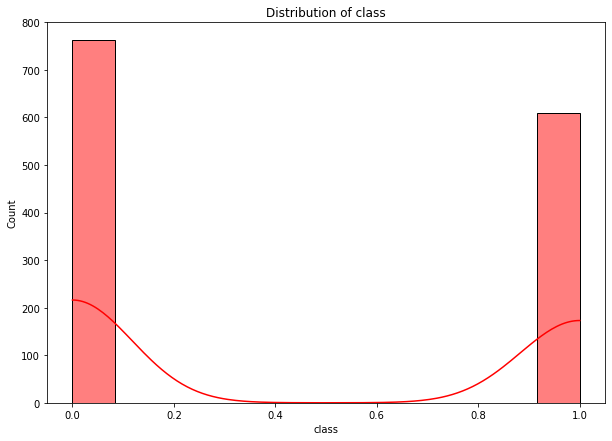

In [16]:
plt.figure(figsize=(10,7))
plt.title("Distribution of class")
sns.histplot(df['class'],color='red',kde=True)
plt.show()

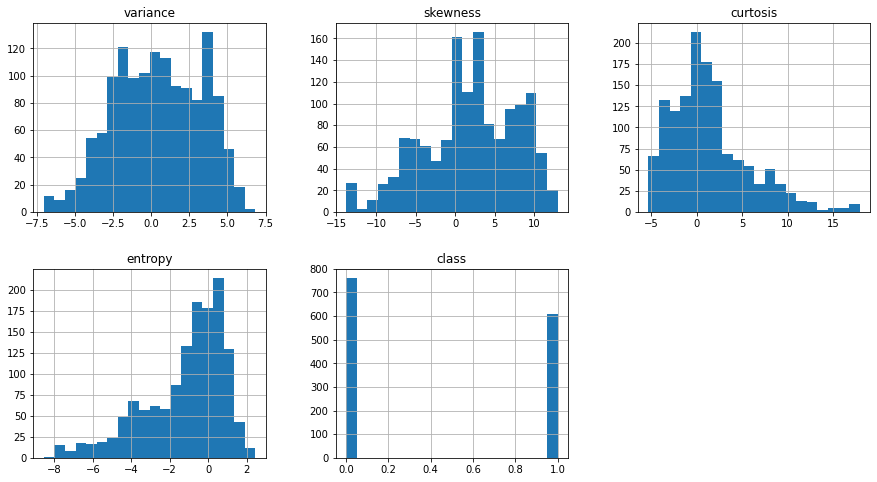

In [20]:
df.hist(bins=20,figsize=(15,8),layout=(2,3));

<IPython.core.display.Javascript object>

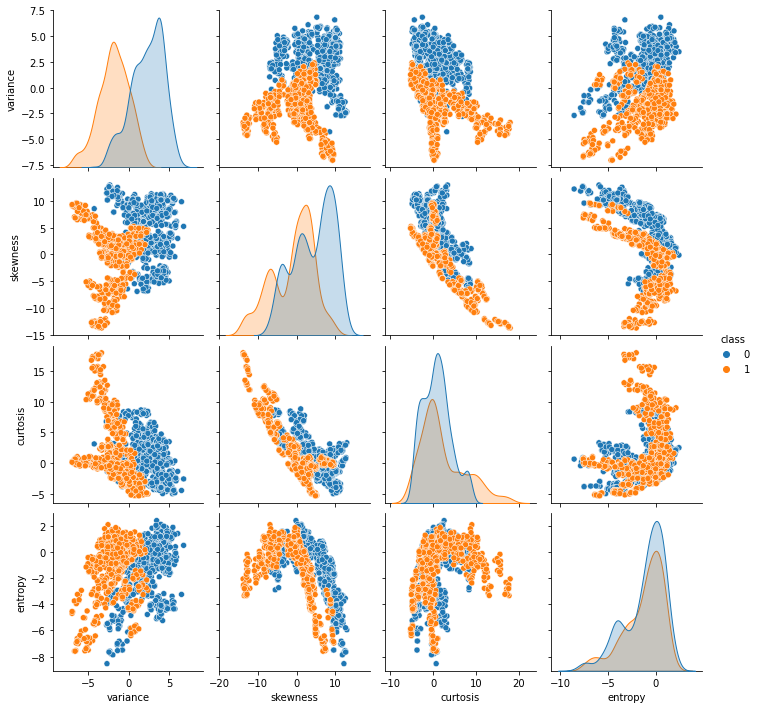

In [21]:
sns.pairplot(df,hue='class')

## **Building our Model**

In [22]:
x=df.drop('class',axis=1)
y=df['class']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)


<IPython.core.display.Javascript object>

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [25]:
x_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

### **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
model_1=LogisticRegression(solver='liblinear',random_state=1) #liblinear is good for small datasets 
model_1.fit(x_train,y_train)
accuracies=cross_val_score(estimator=model_1,X=x_train,y=y_train,cv=10)
print('Accuracies:/n',accuracies)



Accuracies:/n [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [31]:
print("Mean Accuracy",accuracies.mean())

Mean Accuracy 0.9835863219349459


In [36]:
model_predict=model_1.predict(x_test)

In [37]:
model_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

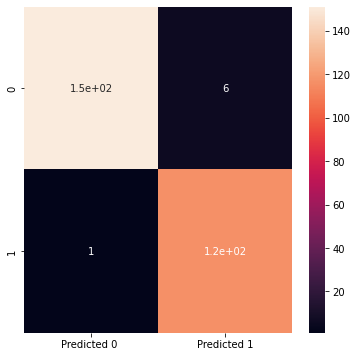

In [40]:
cm=confusion_matrix(y_test,model_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **Support Vector Machine Using (kernel="linear")**



In [42]:
from sklearn.svm import SVC
model_2=SVC(kernel="linear")
model_2.fit(x_train,y_train)
accuracies_2=cross_val_score(estimator=model_2,X=x_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies_2)


Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [44]:
print("Mean Accuracies",accuracies_2.mean())

Mean Accuracies 0.9854045037531277


In [45]:
model_2_predict=model_2.predict(x_test)

In [46]:
model_2_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

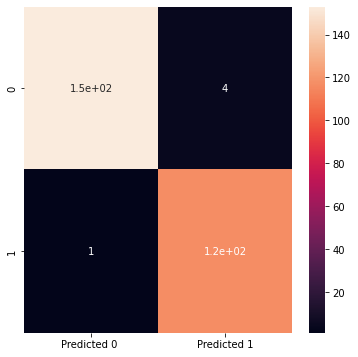

In [47]:
cm=confusion_matrix(y_test,model_2_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **Support Vector Machine Using (kernel='rbf')**

In [48]:
from sklearn.svm import SVC
model_2_rbf=SVC(kernel="rbf")
model_2_rbf.fit(x_train,y_train)
accuracies_2_rbf=cross_val_score(estimator=model_2_rbf,X=x_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies_2_rbf)

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
print("Mean Accuracies",accuracies_2_rbf.mean())

Mean Accuracies 1.0


In [50]:
model_2_rbf_predict=model_2_rbf.predict(x_test)

In [51]:
model_2_rbf_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

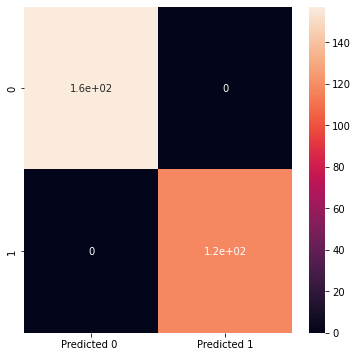

In [52]:
cm=confusion_matrix(y_test,model_2_rbf_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **RandomForestClassifier**

In [54]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=1)
model_3.fit(x_train,y_train)
accuracies_3=cross_val_score(estimator=model_3,X=x_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies_3)

Accuracies:
 [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [56]:
print("Mean Accuracies",accuracies_3.mean())

Mean Accuracies 0.9927272727272728


In [57]:
model_3_predict=model_3.predict(x_test)

In [58]:
model_3_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

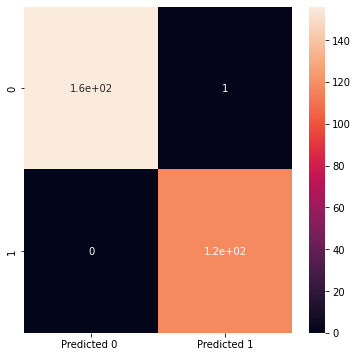

In [59]:
cm=confusion_matrix(y_test,model_3_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **KNeighborsClassifier**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV


In [61]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
param_grid={
    'leaf_size':[2,5,7,9,11],
    'n_neighbors':[2,5,7,9,11],
    'p':[1,2]

}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)
grid.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [63]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [64]:
model_4=KNeighborsClassifier(leaf_size=2,n_neighbors=2,p=1)
model_4.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [67]:
accuracies_4=cross_val_score(estimator=model_4,X=x_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies_4)

Accuracies:
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [68]:
print("Mean Accuracies",accuracies_4.mean())

Mean Accuracies 0.9972727272727273


In [65]:
model_4_predict=model_4.predict(x_test)
model_4_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

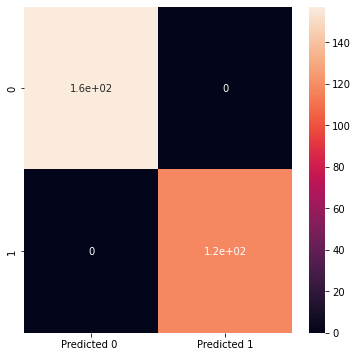

In [66]:
cm=confusion_matrix(y_test,model_4_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **Multilayer Preception**

In [69]:
from sklearn.neural_network import MLPClassifier
MLPClassifier().get_params()


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [71]:
mlp_classifier=MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000,alpha=0.0001,solver='sgd',verbose=10,random_state=1,tol=0.00000001)
mlp_classifier.fit(x_train,y_train)




Streaming output truncated to the last 5000 lines.
Iteration 3001, loss = 0.00251726
Iteration 3002, loss = 0.00251612
Iteration 3003, loss = 0.00251487
Iteration 3004, loss = 0.00251378
Iteration 3005, loss = 0.00251257
Iteration 3006, loss = 0.00251132
Iteration 3007, loss = 0.00251010
Iteration 3008, loss = 0.00250907
Iteration 3009, loss = 0.00250762
Iteration 3010, loss = 0.00250651
Iteration 3011, loss = 0.00250557
Iteration 3012, loss = 0.00250399
Iteration 3013, loss = 0.00250295
Iteration 3014, loss = 0.00250146
Iteration 3015, loss = 0.00250098
Iteration 3016, loss = 0.00249894
Iteration 3017, loss = 0.00249761
Iteration 3018, loss = 0.00249649
Iteration 3019, loss = 0.00249520
Iteration 3020, loss = 0.00249400
Iteration 3021, loss = 0.00249268
Iteration 3022, loss = 0.00249145
Iteration 3023, loss = 0.00249042
Iteration 3024, loss = 0.00248927
Iteration 3025, loss = 0.00248799
Iteration 3026, loss = 0.00248669
Iteration 3027, loss = 0.00248590
Iteration 3028, loss = 0.002484

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=1,
              solver='sgd', tol=1e-08, verbose=10)

In [74]:
accuracies_5=cross_val_score(estimator=mlp_classifier,X=x_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies_5)

Streaming output truncated to the last 5000 lines.
Iteration 3054, loss = 0.00339111
Iteration 3055, loss = 0.00338951
Iteration 3056, loss = 0.00338768
Iteration 3057, loss = 0.00338633
Iteration 3058, loss = 0.00338415
Iteration 3059, loss = 0.00338244
Iteration 3060, loss = 0.00338070
Iteration 3061, loss = 0.00337899
Iteration 3062, loss = 0.00337731
Iteration 3063, loss = 0.00337543
Iteration 3064, loss = 0.00337347
Iteration 3065, loss = 0.00337182
Iteration 3066, loss = 0.00337042
Iteration 3067, loss = 0.00336834
Iteration 3068, loss = 0.00336668
Iteration 3069, loss = 0.00336481
Iteration 3070, loss = 0.00336321
Iteration 3071, loss = 0.00336163
Iteration 3072, loss = 0.00335960
Iteration 3073, loss = 0.00335790
Iteration 3074, loss = 0.00335667
Iteration 3075, loss = 0.00335441
Iteration 3076, loss = 0.00335276
Iteration 3077, loss = 0.00335126
Iteration 3078, loss = 0.00334954
Iteration 3079, loss = 0.00334756
Iteration 3080, loss = 0.00334583
Iteration 3081, loss = 0.003344

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3027, loss = 0.00317320
Iteration 3028, loss = 0.00317200
Iteration 3029, loss = 0.00317027
Iteration 3030, loss = 0.00316878
Iteration 3031, loss = 0.00316714
Iteration 3032, loss = 0.00316577
Iteration 3033, loss = 0.00316440
Iteration 3034, loss = 0.00316309
Iteration 3035, loss = 0.00316125
Iteration 3036, loss = 0.00315993
Iteration 3037, loss = 0.00315870
Iteration 3038, loss = 0.00315675
Iteration 3039, loss = 0.00315566
Iteration 3040, loss = 0.00315373
Iteration 3041, loss = 0.00315251
Iteration 3042, loss = 0.00315130
Iteration 3043, loss = 0.00314955
Iteration 3044, loss = 0.00314793
Iteration 3045, loss = 0.00314692
Iteration 3046, loss = 0.00314511
Iteration 3047, loss = 0.00314392
Iteration 3048, loss = 0.00314237
Iteration 3049, loss = 0.00314069
Iteration 3050, loss = 0.00313900
Iteration 3051, loss = 0.00313761
Iteration 3052, loss = 0.00313629
Iteration 3053, loss = 0.00313471
Iteration 3054, loss = 0.003133

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3013, loss = 0.00316675
Iteration 3014, loss = 0.00316546
Iteration 3015, loss = 0.00316355
Iteration 3016, loss = 0.00316210
Iteration 3017, loss = 0.00316054
Iteration 3018, loss = 0.00315897
Iteration 3019, loss = 0.00315728
Iteration 3020, loss = 0.00315568
Iteration 3021, loss = 0.00315443
Iteration 3022, loss = 0.00315279
Iteration 3023, loss = 0.00315099
Iteration 3024, loss = 0.00314956
Iteration 3025, loss = 0.00314786
Iteration 3026, loss = 0.00314631
Iteration 3027, loss = 0.00314484
Iteration 3028, loss = 0.00314346
Iteration 3029, loss = 0.00314175
Iteration 3030, loss = 0.00314016
Iteration 3031, loss = 0.00313837
Iteration 3032, loss = 0.00313687
Iteration 3033, loss = 0.00313550
Iteration 3034, loss = 0.00313390
Iteration 3035, loss = 0.00313227
Iteration 3036, loss = 0.00313111
Iteration 3037, loss = 0.00312948
Iteration 3038, loss = 0.00312756
Iteration 3039, loss = 0.00312639
Iteration 3040, loss = 0.003124

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3081, loss = 0.00299879
Iteration 3082, loss = 0.00299730
Iteration 3083, loss = 0.00299594
Iteration 3084, loss = 0.00299461
Iteration 3085, loss = 0.00299302
Iteration 3086, loss = 0.00299119
Iteration 3087, loss = 0.00298980
Iteration 3088, loss = 0.00298850
Iteration 3089, loss = 0.00298692
Iteration 3090, loss = 0.00298547
Iteration 3091, loss = 0.00298420
Iteration 3092, loss = 0.00298265
Iteration 3093, loss = 0.00298123
Iteration 3094, loss = 0.00298009
Iteration 3095, loss = 0.00297834
Iteration 3096, loss = 0.00297679
Iteration 3097, loss = 0.00297537
Iteration 3098, loss = 0.00297409
Iteration 3099, loss = 0.00297261
Iteration 3100, loss = 0.00297116
Iteration 3101, loss = 0.00296971
Iteration 3102, loss = 0.00296823
Iteration 3103, loss = 0.00296680
Iteration 3104, loss = 0.00296567
Iteration 3105, loss = 0.00296393
Iteration 3106, loss = 0.00296269
Iteration 3107, loss = 0.00296121
Iteration 3108, loss = 0.002959

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3065, loss = 0.00316624
Iteration 3066, loss = 0.00316510
Iteration 3067, loss = 0.00316334
Iteration 3068, loss = 0.00316195
Iteration 3069, loss = 0.00316033
Iteration 3070, loss = 0.00315888
Iteration 3071, loss = 0.00315742
Iteration 3072, loss = 0.00315611
Iteration 3073, loss = 0.00315437
Iteration 3074, loss = 0.00315290
Iteration 3075, loss = 0.00315181
Iteration 3076, loss = 0.00315017
Iteration 3077, loss = 0.00314909
Iteration 3078, loss = 0.00314701
Iteration 3079, loss = 0.00314562
Iteration 3080, loss = 0.00314401
Iteration 3081, loss = 0.00314268
Iteration 3082, loss = 0.00314112
Iteration 3083, loss = 0.00314014
Iteration 3084, loss = 0.00313826
Iteration 3085, loss = 0.00313689
Iteration 3086, loss = 0.00313519
Iteration 3087, loss = 0.00313376
Iteration 3088, loss = 0.00313243
Iteration 3089, loss = 0.00313075
Iteration 3090, loss = 0.00312943
Iteration 3091, loss = 0.00312826
Iteration 3092, loss = 0.003126

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3004, loss = 0.00326614
Iteration 3005, loss = 0.00326441
Iteration 3006, loss = 0.00326281
Iteration 3007, loss = 0.00326129
Iteration 3008, loss = 0.00325970
Iteration 3009, loss = 0.00325818
Iteration 3010, loss = 0.00325623
Iteration 3011, loss = 0.00325499
Iteration 3012, loss = 0.00325311
Iteration 3013, loss = 0.00325164
Iteration 3014, loss = 0.00325007
Iteration 3015, loss = 0.00324838
Iteration 3016, loss = 0.00324686
Iteration 3017, loss = 0.00324520
Iteration 3018, loss = 0.00324384
Iteration 3019, loss = 0.00324193
Iteration 3020, loss = 0.00324041
Iteration 3021, loss = 0.00323892
Iteration 3022, loss = 0.00323757
Iteration 3023, loss = 0.00323580
Iteration 3024, loss = 0.00323397
Iteration 3025, loss = 0.00323240
Iteration 3026, loss = 0.00323097
Iteration 3027, loss = 0.00322920
Iteration 3028, loss = 0.00322793
Iteration 3029, loss = 0.00322640
Iteration 3030, loss = 0.00322478
Iteration 3031, loss = 0.003223

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3038, loss = 0.00361195
Iteration 3039, loss = 0.00360971
Iteration 3040, loss = 0.00360799
Iteration 3041, loss = 0.00360586
Iteration 3042, loss = 0.00360416
Iteration 3043, loss = 0.00360266
Iteration 3044, loss = 0.00360044
Iteration 3045, loss = 0.00359858
Iteration 3046, loss = 0.00359674
Iteration 3047, loss = 0.00359470
Iteration 3048, loss = 0.00359308
Iteration 3049, loss = 0.00359119
Iteration 3050, loss = 0.00358898
Iteration 3051, loss = 0.00358765
Iteration 3052, loss = 0.00358547
Iteration 3053, loss = 0.00358388
Iteration 3054, loss = 0.00358154
Iteration 3055, loss = 0.00357968
Iteration 3056, loss = 0.00357759
Iteration 3057, loss = 0.00357621
Iteration 3058, loss = 0.00357401
Iteration 3059, loss = 0.00357224
Iteration 3060, loss = 0.00357047
Iteration 3061, loss = 0.00356859
Iteration 3062, loss = 0.00356673
Iteration 3063, loss = 0.00356474
Iteration 3064, loss = 0.00356302
Iteration 3065, loss = 0.003560

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3070, loss = 0.00296816
Iteration 3071, loss = 0.00296695
Iteration 3072, loss = 0.00296550
Iteration 3073, loss = 0.00296379
Iteration 3074, loss = 0.00296269
Iteration 3075, loss = 0.00296103
Iteration 3076, loss = 0.00296002
Iteration 3077, loss = 0.00295859
Iteration 3078, loss = 0.00295694
Iteration 3079, loss = 0.00295619
Iteration 3080, loss = 0.00295428
Iteration 3081, loss = 0.00295334
Iteration 3082, loss = 0.00295195
Iteration 3083, loss = 0.00295026
Iteration 3084, loss = 0.00294876
Iteration 3085, loss = 0.00294753
Iteration 3086, loss = 0.00294652
Iteration 3087, loss = 0.00294490
Iteration 3088, loss = 0.00294350
Iteration 3089, loss = 0.00294218
Iteration 3090, loss = 0.00294086
Iteration 3091, loss = 0.00293958
Iteration 3092, loss = 0.00293798
Iteration 3093, loss = 0.00293677
Iteration 3094, loss = 0.00293529
Iteration 3095, loss = 0.00293405
Iteration 3096, loss = 0.00293265
Iteration 3097, loss = 0.002931

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3046, loss = 0.00331441
Iteration 3047, loss = 0.00331259
Iteration 3048, loss = 0.00331057
Iteration 3049, loss = 0.00330926
Iteration 3050, loss = 0.00330771
Iteration 3051, loss = 0.00330643
Iteration 3052, loss = 0.00330456
Iteration 3053, loss = 0.00330281
Iteration 3054, loss = 0.00330121
Iteration 3055, loss = 0.00330014
Iteration 3056, loss = 0.00329840
Iteration 3057, loss = 0.00329687
Iteration 3058, loss = 0.00329528
Iteration 3059, loss = 0.00329376
Iteration 3060, loss = 0.00329200
Iteration 3061, loss = 0.00329048
Iteration 3062, loss = 0.00328904
Iteration 3063, loss = 0.00328752
Iteration 3064, loss = 0.00328572
Iteration 3065, loss = 0.00328454
Iteration 3066, loss = 0.00328282
Iteration 3067, loss = 0.00328103
Iteration 3068, loss = 0.00327948
Iteration 3069, loss = 0.00327802
Iteration 3070, loss = 0.00327672
Iteration 3071, loss = 0.00327484
Iteration 3072, loss = 0.00327353
Iteration 3073, loss = 0.003271

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Iteration 3003, loss = 0.00320290
Iteration 3004, loss = 0.00320027
Iteration 3005, loss = 0.00319905
Iteration 3006, loss = 0.00319758
Iteration 3007, loss = 0.00319579
Iteration 3008, loss = 0.00319435
Iteration 3009, loss = 0.00319268
Iteration 3010, loss = 0.00319114
Iteration 3011, loss = 0.00318952
Iteration 3012, loss = 0.00318798
Iteration 3013, loss = 0.00318662
Iteration 3014, loss = 0.00318480
Iteration 3015, loss = 0.00318336
Iteration 3016, loss = 0.00318210
Iteration 3017, loss = 0.00318017
Iteration 3018, loss = 0.00317871
Iteration 3019, loss = 0.00317732
Iteration 3020, loss = 0.00317597
Iteration 3021, loss = 0.00317413
Iteration 3022, loss = 0.00317259
Iteration 3023, loss = 0.00317110
Iteration 3024, loss = 0.00316954
Iteration 3025, loss = 0.00316798
Iteration 3026, loss = 0.00316624
Iteration 3027, loss = 0.00316511
Iteration 3028, loss = 0.00316342
Iteration 3029, loss = 0.00316186
Iteration 3030, loss = 0.003160

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
print("Mean Accuracies",accuracies_5.mean())

Mean Accuracies 1.0


In [72]:
mlp_classifier_predict=mlp_classifier.predict(x_test)
mlp_classifier_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

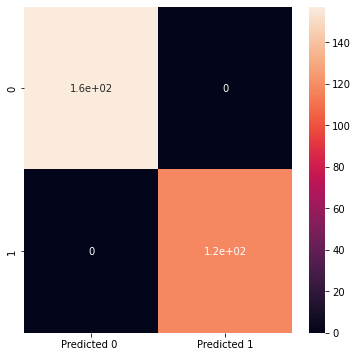

In [73]:
cm=confusion_matrix(y_test,mlp_classifier_predict,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0 ','Predicted 1']])
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,annot=True)
plt.show()

### **EACH ALGORITHEM ACCURACY SCORE**

In [79]:
print("Logistic Regression",accuracies.mean()*100)
print('SUPPORT VECTOR MACHINE',accuracies_2.mean()*100)
print('SUPPORT VECTOR MACHINE(kernel= RBF)',accuracies_2_rbf.mean()*100)
print('RandomForest Classifier',accuracies_3.mean()*100)
print('KNeighbors Classifier',accuracies_4.mean()*100)
print('Multilayer Classifier',accuracies_5.mean()*100)

Logistic Regression 98.35863219349459
SUPPORT VECTOR MACHINE 98.54045037531277
SUPPORT VECTOR MACHINE(kernel= RBF) 100.0
RandomForest Classifier 99.27272727272728
KNeighbors Classifier 99.72727272727273
Multilayer Classifier 100.0
